# **Multi-class Classification**

#### **Objective**
1. Understand the use of one-hot encoding for categorical variables.
2. Implement logistic regression for multi-class classification using **One-vs-All (OvA)** and **One-vs-One (OvO)** strategies.
3. Evaluate model performance using appropriate metrics.

#### **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **About the Dataset**

The data set being used for this lab is the "Obesity Risk Prediction" data set publically available on [UCI Library](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) under the [CCA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) license. The data set has 17 attributes in total along with 2,111 samples.

In [2]:

from ucimlrepo import fetch_ucirepo
import pandas as pd

obesity_data = fetch_ucirepo(id=544)
df_variables = obesity_data.variables.set_index('name')

print("=== Variables Description Table ===")
df_variables

=== Variables Description Table ===


,role,type,demographic,description,units,missing_values
name,,,,,,
Gender,Feature,Categorical,Gender,None,None,no
Age,Feature,Continuous,Age,None,None,no
Height,Feature,Continuous,None,None,None,no
Weight,Feature,Continuous,None,None,None,no
family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no


---

#### **Load the Data**

In [3]:
# Load the Data

# In UCI Repo, it's easier to split between features and targets
X = obesity_data.data.features
y = obesity_data.data.targets

# Concat X and y into one DataFrame
df = pd.concat([X, y], axis=1)

# Check
pd.set_option("display.max_columns", None)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### **Exploratory Data Analysis**

Visualize the distribution of the target variable to understand the class balance.

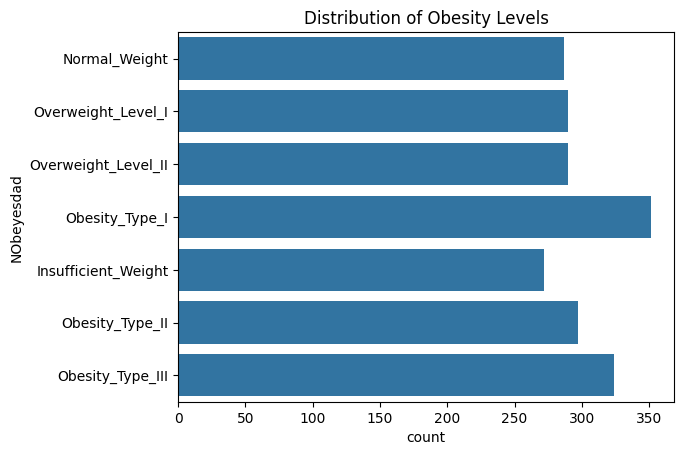

In [4]:
# Distribution of target variable
sns.countplot(df['NObeyesdad'])
plt.title("Distribution of Obesity Levels")
plt.show()

This shows that the datasets is fairly balanced and does not require any special attention in terms of biased training.

##### **Check missing data**
Check for null values, and display a summary of the dataset.

In [5]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


---

#### **Preprocessing the Data**

##### **Seperate Features and Targets**

Actually, since we are using data from UCI Repo the data already been seperated, but for this practice i will seperate them normally.

In [6]:
# Seperate the Data into X and y
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

##### **Splitting the data set**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### **Standardize and Encoding**

* **Standardize:** Scale the numerical features to standardize their ranges for better model performance.
* **Encoding**: Convert categorical variables into numerical format using one-hot encoding.

The method i will use is:
* **Continuous numerical data type:** `StandardScaler`
* **Nominal categorical data type**: `One-Hot encoder`
* **Ordinal categorical data type**: `Ordinal Encoder`
* **Target variable**: `Label Encoder`

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
#from sklearn import set_config

# Define groups
scale_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
nominal_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
ordinal_cols = ['CAEC', 'CALC']

# Define the exact order for ordinal columns manually
# no < Sometimes < Frequently < Always
ordinal_ordering = [
    ['no', 'Sometimes', 'Frequently', 'Always'], # Order of CAEC
    ['no', 'Sometimes', 'Frequently', 'Always'] # Order of CALC
]

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        # Pipe 1: Scale numbers
        ('num', StandardScaler(), scale_cols),
        
        # Pipe 2: One-Hot encode nominals
        ('nom', OneHotEncoder(drop='first'), nominal_cols),

        # Pipe 3: Ordinal encode
        ('ord', OrdinalEncoder(categories=ordinal_ordering), ordinal_cols)
    ]
)

# Apply to X train and test data
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

# Encode Targets variable using LabelEncoder
le = LabelEncoder()
y_train_final = le.fit_transform(y_train)
y_test_final = le.transform(y_test)

#### **Logistic Regression with One-vs-all**

In the One-vs-All approach:
* The algorithm trains a single binary classifier for each class
* Each classifier learns to distinguish a single class from all the others combined
* If there are k classes, k classifier are trained
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class

**Advantages**:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM)

**Disadvantages**:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class

Train a logistic regression model using the One-vs-All startegy and evaluate its performance.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train_final, y_train_final)

LogisticRegression(max_iter=1000, multi_class='ovr')

We can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_ova = model_ova.predict(X_test_final)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {round(100 * accuracy_score(y_test_final, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.6%


#### **Logistic Regression with OvO**
In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset
* If there are K classes, this results in k(k-1)/2 classifiers
* Each classifier is trained to distinguish between two spesific classes, ignoring the rest
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of paiwise comparisons

**Advantages**:
* Suitable for algorithms that are computationally expensive to train on many samples bacause each binary classifier deals with a smaller datasets (only samples from two classes)
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time

**Disadvantage**:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required
* May lead to ambiguous predictions if voting results in a tie

Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train_final, y_train_final)


# Predict
y_pred_ovo = model_ovo.predict(X_test_final)

# Evaluate performance score
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {round(100 * accuracy_score(y_test_final, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 93.85%


---

#### **Try with different test size**

In [11]:
for test_size in [0.1, 0.2, 0.3]:
    # Split with test_size=0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Define groups
    scale_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    nominal_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
    ordinal_cols = ['CAEC', 'CALC']

    # Define the exact order for ordinal columns manually
    # no < Sometimes < Frequently < Always
    ordinal_ordering = [
        ['no', 'Sometimes', 'Frequently', 'Always'], # Order of CAEC
        ['no', 'Sometimes', 'Frequently', 'Always'] # Order of CALC
    ]

    # Create the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            # Pipe 1: Scale numbers
            ('num', StandardScaler(), scale_cols),
            
            # Pipe 2: One-Hot encode nominals
            ('nom', OneHotEncoder(drop='first'), nominal_cols),

            # Pipe 3: Ordinal encode
            ('ord', OrdinalEncoder(categories=ordinal_ordering), ordinal_cols)
        ]
    )

    # Apply to X train and test data
    X_train_final = preprocessor.fit_transform(X_train)
    X_test_final = preprocessor.transform(X_test)

    # Encode Targets variable using LabelEncoder
    le = LabelEncoder()
    y_train_final = le.fit_transform(y_train)
    y_test_final = le.transform(y_test)

    # One-vs-All strategy
    model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
    model_ova.fit(X_train_final, y_train_final)

    # One-vs-One strategy
    model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model_ovo.fit(X_train_final, y_train_final)

    # Predict both model
    y_pred_ova = model_ova.predict(X_test_final)
    y_pred_ovo = model_ovo.predict(X_test_final)

    # Evaluate Performance Score
    print(" ==== Performance Score ===")
    print(f"Accuracy OvA model: {round(100 * accuracy_score(y_test_final, y_pred_ova),2)}%")
    print(f"Accuracy OvO model: {round(100 * accuracy_score(y_test_final, y_pred_ovo),2)}%")
    print(f"Test Size: {test_size}")

 ==== Performance Score ===
Accuracy OvA model: 76.42%
Accuracy OvO model: 93.4%
Test Size: 0.1
 ==== Performance Score ===
Accuracy OvA model: 76.6%
Accuracy OvO model: 93.85%
Test Size: 0.2
 ==== Performance Score ===
Accuracy OvA model: 75.71%
Accuracy OvO model: 91.64%
Test Size: 0.3


---

#### **Feature Importance**

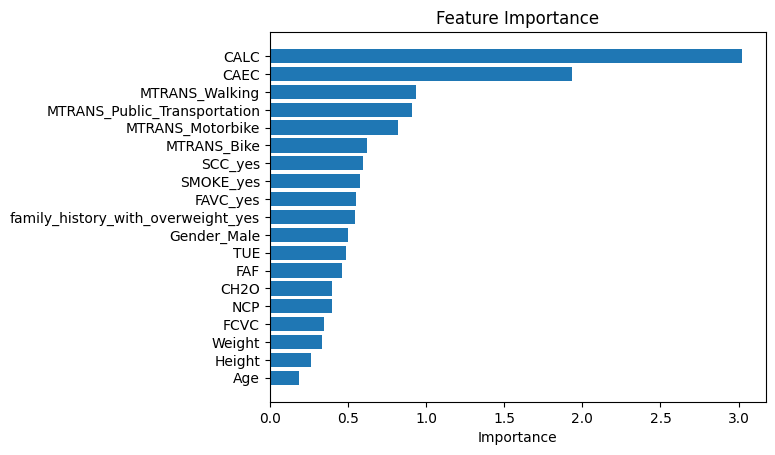

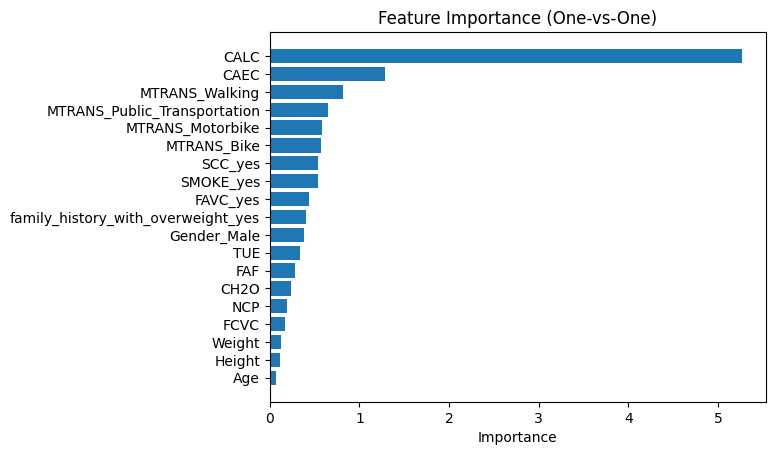

In [76]:
# Collect Feature Names
feature_names = preprocessor.get_feature_names_out()
feature_names = [name.split('__')[-1] for name in feature_names]


# Feature Importance One-vs-All
feature_importance = (np.abs(model_ova.coef_)).mean(axis=0)
feat_imp_ova = pd.Series(feature_importance, index=feature_names).sort_values(ascending=True)
plt.barh(feature_names, feat_imp_ova)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()


# Feature Importance One-vs-One
# Collect all coefficients from each underlying binary classifier
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# Now we take the mean across all those classifiers
feature_importance = (np.abs(coefs)).mean(axis=0)
feat_imp_ovo = pd.Series(feature_importance, index=feature_names).sort_values(ascending=True)
plt.barh(feature_names, feat_imp_ovo)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()

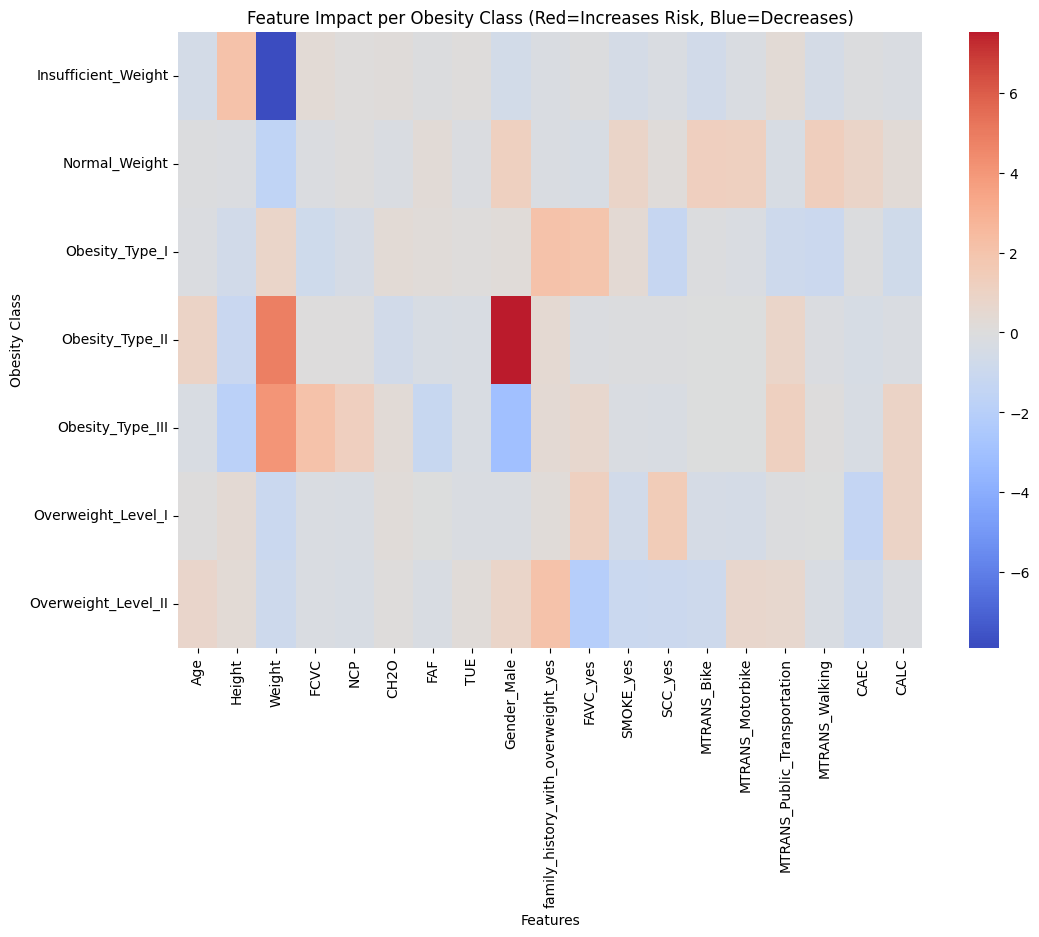

In [74]:
# 1. Get the Coefficients directly
coefficients = model_ova.coef_

# 2. Get Class Names (Target Labels)
class_names = list(le.classes_)

# 3. Create a DataFrame for the Heatmap
df_coef = pd.DataFrame(
    coefficients,
    index=class_names, 
    columns=feature_names
)

# 4. Plot
plt.figure(figsize=(12, 8))
sns.heatmap(df_coef, cmap="coolwarm", center=0, annot=False)

plt.title("Feature Impact per Obesity Class (Red=Increases Risk, Blue=Decreases)")
plt.xlabel("Features")
plt.ylabel("Obesity Class")
plt.show()

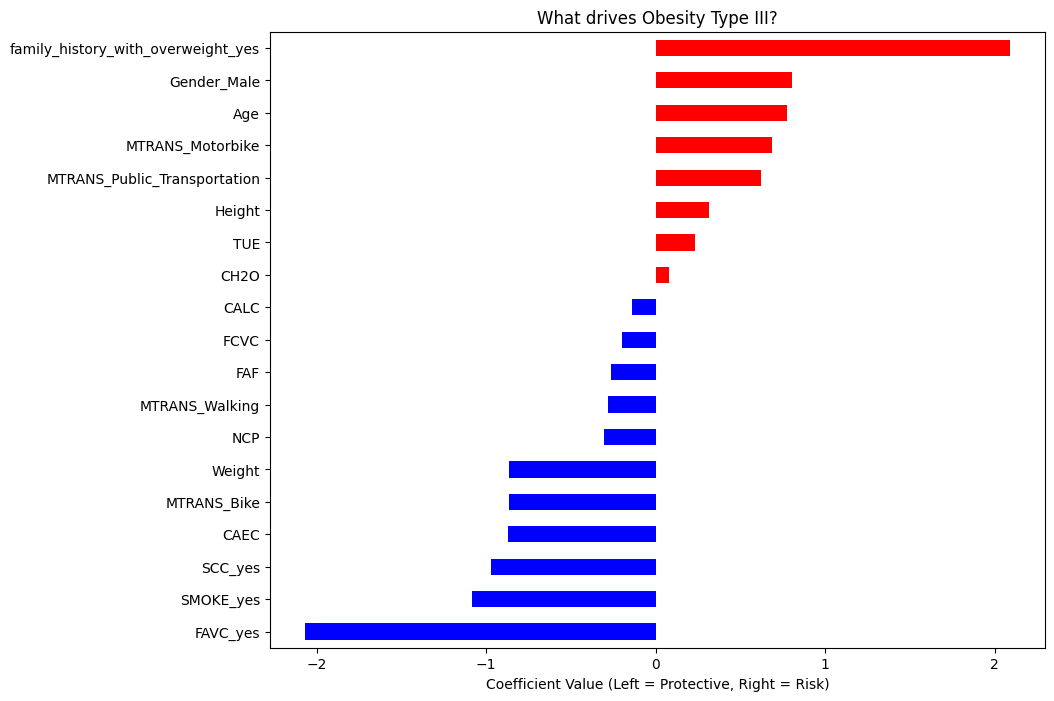

In [68]:
# Let's look at Class 6 (Obesity Type III) specifically
class_index = 6 
class_name = "Obesity Type III"

# Get data for this specific class
class_coefs = model_ova.coef_[class_index]
series_coef = pd.Series(class_coefs, index=feature_names).sort_values()

# Plot Diverging Bars
plt.figure(figsize=(10, 8))
colors = ['red' if x > 0 else 'blue' for x in series_coef.values]
series_coef.plot(kind='barh', color=colors)
plt.title(f"What drives {class_name}?")
plt.xlabel("Coefficient Value (Left = Protective, Right = Risk)")
plt.show()

----

#### **Automate the entire pipeline**

In [69]:
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load the Data
    df = pd.read_csv(data_path)

    # Seperate the Feature and Targets
    X = df.drop('NObeyesdad', axis=1)
    y = df.NObeyesdad
    
    # Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)

    # Standardize and Encoding
    # Define groups
    scale_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
    nominal_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
    ordinal_cols = ['CAEC', 'CALC']

    # Define the exact order for ordinal columns manually
    # no < Sometimes < Frequently < Always
    ordinal_ordering = [
        ['no', 'Sometimes', 'Frequently', 'Always'], # Order of CAEC
        ['no', 'Sometimes', 'Frequently', 'Always'] # Order of CALC
    ]

    # Create the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            # Pipe 1: Scale numbers
            ('num', StandardScaler(), scale_cols),
            
            # Pipe 2: One-Hot encode nominals
            ('nom', OneHotEncoder(drop='first'), nominal_cols),

            # Pipe 3: Ordinal encode
            ('ord', OrdinalEncoder(categories=ordinal_ordering), ordinal_cols)
        ]
    )

    # Apply to X train and test data
    X_train_final = preprocessor.fit_transform(X_train)
    X_test_final = preprocessor.transform(X_test)

    # Encode Targets variable using LabelEncoder
    le = LabelEncoder()
    y_train_final = le.fit_transform(y_train)
    y_test_final = le.transform(y_test)

    # Train the Model
    # One-vs-All Model
    model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
    model_ova.fit(X_train_final, y_train_final)

    # One-vs-One model
    model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model_ovo.fit(X_train_final, y_train_final)

    # Predict
    y_pred_ova = model_ova.predict(X_test_final)
    y_pred_ovo = model_ovo.predict(X_test_final)

    # Evaluate
    print("=== Performance Score ===")
    print(f"One-vs-All Model Accuracy: {round(100 * accuracy_score(y_test_final, y_pred_ova), 2)}%")
    print(f"One-vs-One Model Accuracy: {round(100 * accuracy_score(y_test_final, y_pred_ovo), 2)}%")

    # Feature Importance
    # Collect all feature names
    feature_names = preprocessor.get_feature_names_out()
    feature_names = [name.split('__')[-1] for name in feature_names]
    
    # Set up Subplots
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))

    # Plot 1: One-vs-All
    # Calculate coefficient
    feature_importance_ova = (np.abs(model_ova.coef_)).mean(axis=0) 
    feat_imp_ova = pd.Series(feature_importance_ova, index=feature_names).sort_values(ascending=True)
    
    ax[0].barh(feat_imp_ova.index, feat_imp_ova.values, color='skyblue')
    ax[0].set_title("Feature Importance (One-vs-All)")
    ax[0].set_xlabel("Mean Absolute Coefficient")

    # Plot 2: One-vs-One
    # Calculate coefficient
    coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])
    feature_importance_ova = (np.abs(coefs)).mean(axis=0)
    feat_imp_ovo = pd.Series(feature_importance_ova, index=feature_names).sort_values(ascending=True)

    ax[1].barh(feat_imp_ovo.index, feat_imp_ovo.values, color='salmon')
    ax[1].set_title("Feature Importance (One-vs-One)")
    ax[1].set_xlabel("Mean Absolute Coefficient")

    plt.tight_layout()
    plt.show()

=== Performance Score ===
One-vs-All Model Accuracy: 74.61%
One-vs-One Model Accuracy: 93.69%


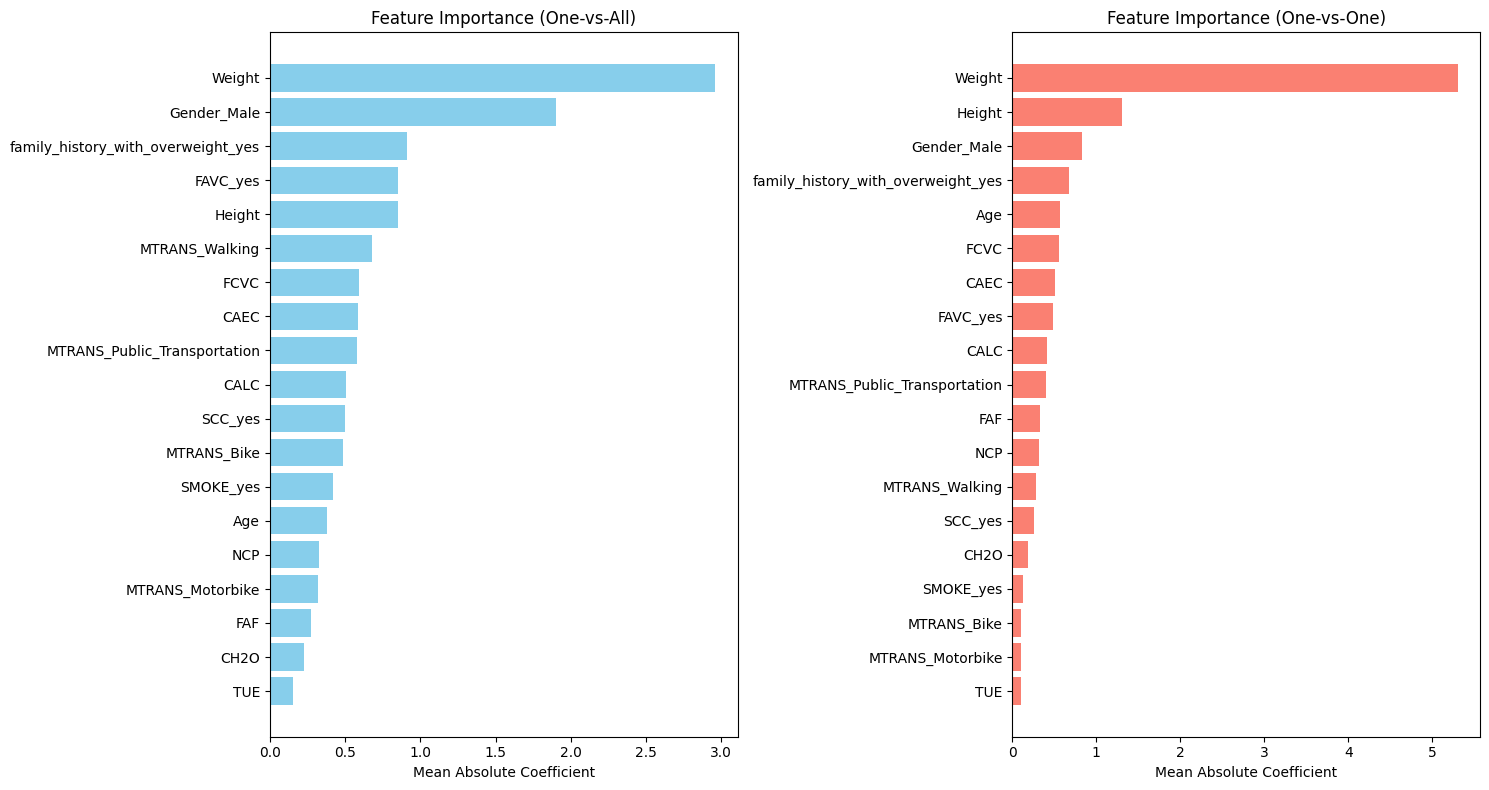

In [71]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
obesity_risk_pipeline(url, test_size=0.3)